# K-Means Profesiones

### Importamos los datos y limpiamos los datos no numericos

In [11]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("analisis_clean.csv")

# Ver las primeras filas
print(df.head())


           usuario        op        co        ex        ag        ne  \
0     3gerardpique  0.102638  0.485725  0.565391  0.641501  0.383967   
1  aguerosergiokun  0.359116  0.303292  0.467902  0.478723  0.406663   
2   albertochicote  0.281061  0.141023  0.493696  0.810161  0.340190   
3    AlejandroSanz  0.248507  0.180081  0.817966  0.696232  0.174393   
4   alfredocasero1  0.159427  0.282146  0.725415  0.698045  0.273474   

   wordcount  
0   0.151175  
1   0.347735  
2   0.208518  
3   0.355544  
4   0.198168  


In [12]:
# Eliminar columnas no numéricas si existen
df_numeric = df.select_dtypes(include=['float64', 'int64'])


### Aplicamos el modelo con todas las columnas

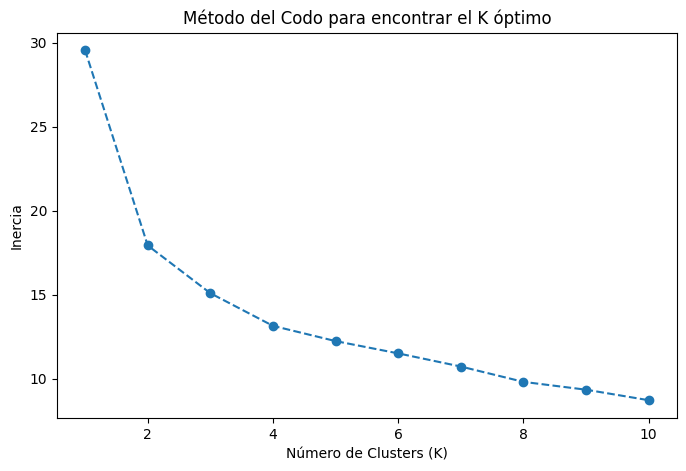

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir rango de valores de K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el K óptimo')
plt.show()


In [14]:
# Definir el número óptimo de clusters (ajusta según la gráfica del codo)
optimal_k = 4  # Cambia este valor según el resultado del método del codo

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_numeric)

# Mostrar resultados
print(df[['usuario', 'cluster']].head())  # Si hay una columna con nombres


           usuario  cluster
0     3gerardpique        3
1  aguerosergiokun        1
2   albertochicote        3
3    AlejandroSanz        3
4   alfredocasero1        3


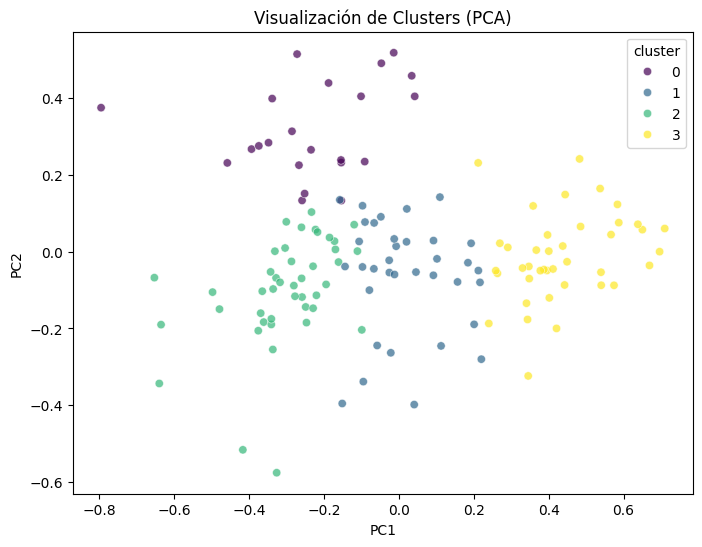

In [15]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_numeric)

# Crear DataFrame con los valores transformados
df_plot = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Agregar la columna de clusters
df_plot['cluster'] = df['cluster']

# Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.7)
plt.title("Visualización de Clusters (PCA)")
plt.show()


Listar cada uno de los cluster

In [17]:
# Agrupar por cluster y mostrar los usuarios dentro de cada uno
clusters = df.groupby('cluster')['usuario'].apply(list)

# Mostrar los clusters
for cluster_id, usuarios in clusters.items():
    print(f"🔹 Cluster {cluster_id}: {len(usuarios)} elementos")
    print(usuarios)
    print("-" * 50)


🔹 Cluster 0: 22 elementos
['andyroddick', 'andy_murray', 'BarackObama', 'BillGates', 'cesarmillan', 'Clyburn', 'Diane_Keaton', 'EdwardNorton', 'HerreraBeutler', 'HillaryClinton', 'jessicaalba', 'jiminhofe', 'jimlangevin', 'jk_rowling', 'JohnKerry', 'justdemi', 'KevinSpacey', 'ladygaga', 'LeoDiCaprio', 'MeganFox516', 'Rep_Hunter', 'thelittleidiot']
--------------------------------------------------
🔹 Cluster 1: 35 elementos
['aguerosergiokun', 'andresiniesta8', 'antoniobanderas', 'BarRefaeli', 'Carrie_Br4dshaw', 'DidacLee', 'edans', 'epunset', 'FernandezAnibal', 'heidiklum', 'hughlaurie', 'ierrejon', 'iescolar', 'JesusEncinar', 'jtimberlake', 'justinbieber', 'KAKA', 'KateUpton', 'kobebryant', 'LennyKravitz', 'lorenzo99', 'MileyCyrus', 'Pablo_Iglesias_', 'paugasol', 'PaulaMeliveo', 'paulocoelho', 'RafaelNadal', 'RealHughJackman', 'sanchezcastejon', 'SarahPalinUSA', 'shakira', 'SSantiagosegura', 'stevewoz', 'tomhanks', 'usainbolt']
--------------------------------------------------
🔹 Clus

### Aplicamos el modelo con las columnas "ag" y "ex" 

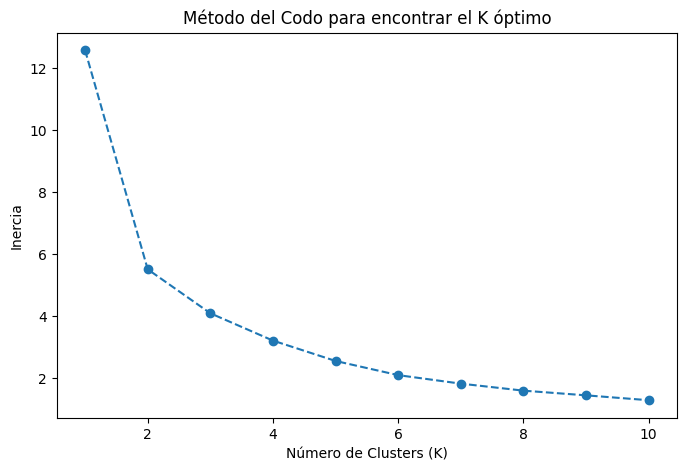

In [19]:
columns_to_use = ['ex', 'ag']
df_selected = df[columns_to_use]

# Definir rango de valores de K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_selected)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el K óptimo')
plt.show()

In [ ]:
# Definir el número de clusters
optimal_k = 2

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_selected)



           usuario  cluster
0     3gerardpique        1
1  aguerosergiokun        0
2   albertochicote        1
3    AlejandroSanz        1
4   alfredocasero1        1


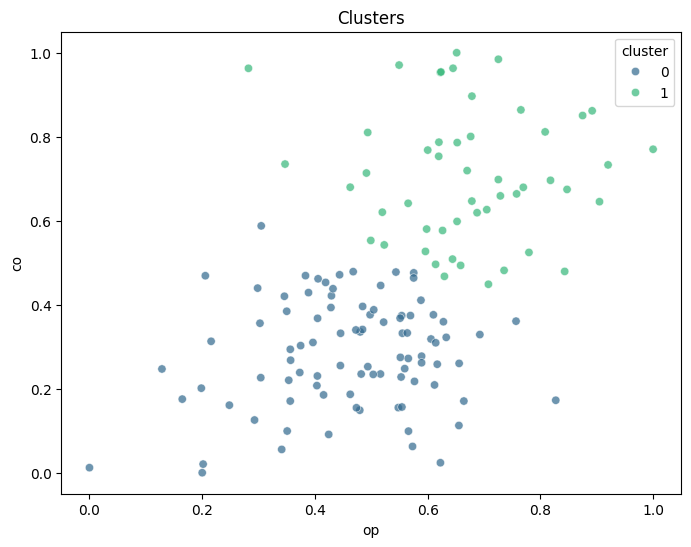

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ex', y='ag', hue='cluster', palette='viridis', alpha=0.7)
plt.title("Clusters")
plt.xlabel('op')
plt.ylabel('co')
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # Para el gráfico 3D

# Seleccionar las columnas a utilizar
columns_to_use = ['op', 'co', 'ex']  # Puedes cambiar a ['op', 'co'] si solo usas 2
df_selected = df[columns_to_use]

# Definir el número de clusters
optimal_k = 4  

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_selected)

# Mostrar los clusters asignados
print(df[['usuario', 'cluster']].head())


           usuario  cluster
0     3gerardpique        0
1  aguerosergiokun        2
2   albertochicote        2
3    AlejandroSanz        3
4   alfredocasero1        3


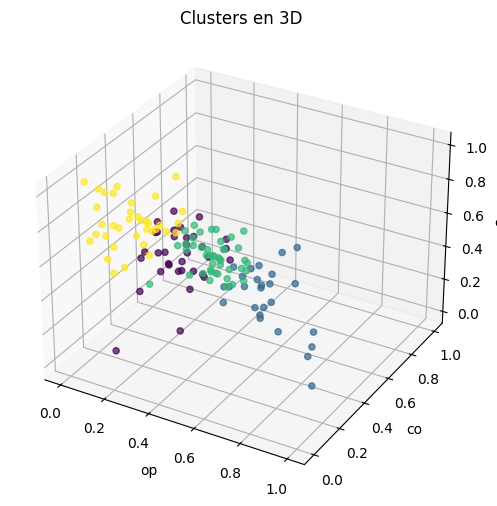

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos en 3D
ax.scatter(df['op'], df['co'], df['ex'], c=df['cluster'], cmap='viridis', alpha=0.7)

# Etiquetas
ax.set_title("Clusters en 3D")
ax.set_xlabel('op')
ax.set_ylabel('co')
ax.set_zlabel('ex')

plt.show()
